CS4001/4042 Assignment 1
---
Part B, Q1 (15 marks)
---

Real world datasets often have a mix of numeric and categorical features – this dataset is one example. To build models on such data, categorical features have to be encoded or embedded.

PyTorch Tabular is a library that makes it very convenient to build neural networks for tabular data. It is built on top of PyTorch Lightning, which abstracts away boilerplate model training code and makes it easy to integrate other tools, e.g. TensorBoard for experiment tracking.

For questions B1 and B2, the following features should be used:   
- **Numeric / Continuous** features: dist_to_nearest_stn, dist_to_dhoby, degree_centrality, eigenvector_centrality, remaining_lease_years, floor_area_sqm
- **Categorical** features: month, town, flat_model_type, storey_range



---



In [1]:
pip install "pytorch_tabular[extra]"

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip uninstall "torch" -y

Found existing installation: torch 2.5.1
Uninstalling torch-2.5.1:
  Successfully uninstalled torch-2.5.1
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install torch==2.5.1

  Using cached torch-2.5.1-cp311-none-macosx_11_0_arm64.whl.metadata (28 kB)
Using cached torch-2.5.1-cp311-none-macosx_11_0_arm64.whl (63.9 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchvision 0.21.0 requires torch==2.6.0, but you have torch 2.5.1 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [1]:
SEED = 42

import os

import random
random.seed(SEED)

import numpy as np
np.random.seed(SEED)

import pandas as pd

import torch
import torch.nn as nn

from pytorch_tabular import TabularModel
from pytorch_tabular.models import CategoryEmbeddingModelConfig
from pytorch_tabular.config import (
    DataConfig,
    OptimizerConfig,
    TrainerConfig,
)

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

> Divide the dataset (‘hdb_price_prediction.csv’) into train and test sets by using entries from year 2020 and before as training data, and year 2021 as test data (validation set is not required).
**Do not** use data from year 2022 and year 2023.



In [2]:
df = pd.read_csv('hdb_price_prediction.csv')
df_train = df[df['year'] <= 2020]
df_test = df[df['year'] == 2021] 

> Refer to the documentation of **PyTorch Tabular** and perform the following tasks: https://pytorch-tabular.readthedocs.io/en/latest/#usage
- Use **[DataConfig](https://pytorch-tabular.readthedocs.io/en/latest/data/)** to define the target variable, as well as the names of the continuous and categorical variables.
- Use **[TrainerConfig](https://pytorch-tabular.readthedocs.io/en/latest/training/)** to automatically tune the learning rate. Set batch_size to be 1024 and set max_epoch as 50.
- Use **[CategoryEmbeddingModelConfig](https://pytorch-tabular.readthedocs.io/en/latest/models/#category-embedding-model)** to create a feedforward neural network with 1 hidden layer containing 50 neurons.
- Use **[OptimizerConfig](https://pytorch-tabular.readthedocs.io/en/latest/optimizer/)** to choose Adam optimiser. There is no need to set the learning rate (since it will be tuned automatically) nor scheduler.
- Use **[TabularModel](https://pytorch-tabular.readthedocs.io/en/latest/tabular_model/)** to initialise the model and put all the configs together.

In [3]:
data_config = DataConfig(
    target=["resale_price"],
    continuous_cols=["dist_to_nearest_stn", "dist_to_dhoby", "degree_centrality",
                     "eigenvector_centrality", "remaining_lease_years", "floor_area_sqm"],
    categorical_cols=["month", "town", "flat_model_type", "storey_range"]
)

trainer_config = TrainerConfig(batch_size=1024, max_epochs=50, accelerator="auto", auto_lr_find=True)
model_config = CategoryEmbeddingModelConfig(task="regression", layers='50', seed=10, metrics=['mean_squared_error','r2_score'])
optimizer_config = OptimizerConfig(optimizer='Adam')

tabular_model = TabularModel(
    data_config=data_config,
    model_config=model_config,
    optimizer_config=optimizer_config,
    trainer_config=trainer_config,
)

2025-03-11 10:12:24,522 - {pytorch_tabular.tabular_model:146} - INFO - Experiment Tracking is turned off

> Report the test RMSE error and the test R2 value that you obtained.



In [4]:
tabular_model.fit(train=df_train)

Seed set to 42


2025-03-11 10:12:27,259 - {pytorch_tabular.tabular_model:548} - INFO - Preparing the DataLoaders

2025-03-11 10:12:27,286 - {pytorch_tabular.tabular_datamodule:522} - INFO - Setting up the datamodule for          
regression task

2025-03-11 10:12:27,357 - {pytorch_tabular.tabular_model:599} - INFO - Preparing the Model: CategoryEmbeddingModel

2025-03-11 10:12:27,380 - {pytorch_tabular.tabular_model:342} - INFO - Preparing the Trainer

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


2025-03-11 10:12:27,417 - {pytorch_tabular.tabular_model:656} - INFO - Auto LR Find Started

/Users/yuki/Library/Mobile Documents/com~apple~CloudDocs/NTU/Y2S2/SC4001/Projects/Assignment1/.venv/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:654: Checkpoint directory /Users/yuki/Library/Mobile Documents/com~apple~CloudDocs/NTU/Y2S2/SC4001/Projects/Assignment1/saved_models exists and is not empty.
/Users/yuki/Library/Mobile Documents/com~apple~CloudDocs/NTU/Y2S2/SC4001/Projects/Assignment1/.venv/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=9` in the `DataLoader` to improve performance.
/Users/yuki/Library/Mobile Documents/com~apple~CloudDocs/NTU/Y2S2/SC4001/Projects/Assignment1/.venv/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:424: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider in

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.5754399373371567
Restoring states from the checkpoint path at /Users/yuki/Library/Mobile Documents/com~apple~CloudDocs/NTU/Y2S2/SC4001/Projects/Assignment1/.lr_find_747fb6cf-3461-4461-8cb0-d991af86e23f.ckpt
Restored all states from the checkpoint at /Users/yuki/Library/Mobile Documents/com~apple~CloudDocs/NTU/Y2S2/SC4001/Projects/Assignment1/.lr_find_747fb6cf-3461-4461-8cb0-d991af86e23f.ckpt


2025-03-11 10:12:30,293 - {pytorch_tabular.tabular_model:669} - INFO - Suggested LR: 0.5754399373371567. For plot  
and detailed analysis, use `find_learning_rate` method.

2025-03-11 10:12:30,295 - {pytorch_tabular.tabular_model:678} - INFO - Training Started

┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃   ┃ Name             ┃ Type                      ┃ Params ┃ Mode  ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│ 0 │ _backbone        │ CategoryEmbeddingBackbone │  3.0 K │ train │
│ 1 │ _embedding_layer │ Embedding1dLayer          │  1.6 K │ train │
│ 2 │ head             │ LinearHead                │     51 │ train │
│ 3 │ loss             │ MSELoss                   │      0 │ train │
└───┴──────────────────┴───────────────────────────┴────────┴───────┘

Trainable params: 4.6 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 4.6 K                                                                                                
Total estimated model params size (MB): 0                                                                          
Modules in train mode: 16                                                                                          
Modules in eval mode: 0

Output()

2025-03-11 10:12:46,012 - {pytorch_tabular.tabular_model:689} - INFO - Training the model completed

2025-03-11 10:12:46,013 - {pytorch_tabular.tabular_model:1529} - INFO - Loading the best model

In [5]:
pred_df = tabular_model.predict(df_test)

In [6]:
test_results = tabular_model.evaluate(df_test)
print(f"RMSE: {np.sqrt(test_results[0]['test_mean_squared_error']):.0f}")
print(f"R2 score: {test_results[0]['test_r2_score']:.4f}")

Output()

/Users/yuki/Library/Mobile Documents/com~apple~CloudDocs/NTU/Y2S2/SC4001/Projects/Assignment1/.venv/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:424: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=9` in the `DataLoader` to improve performance.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │       4484307968.0        │
│  test_mean_squared_error  │       4484307968.0        │
│       test_r2_score       │    0.7408820986747742     │
└───────────────────────────┴───────────────────────────┘

RMSE: 66965
R2 score: 0.7409


> Print out the corresponding rows in the dataframe for the top 25 test samples with the largest errors. 



In [7]:
results_df = df_test.copy()
results_df['prediction'] = pred_df['resale_price_prediction']
results_df['error'] = abs(results_df['resale_price'] - results_df['prediction'])

top_errors = results_df.sort_values(by='error', ascending=False).head(25)
display(top_errors)

,month,year,town,full_address,nearest_stn,dist_to_nearest_stn,dist_to_dhoby,degree_centrality,eigenvector_centrality,flat_model_type,remaining_lease_years,floor_area_sqm,storey_range,resale_price,prediction,error
92405,11,2021,BUKIT MERAH,46 SENG POH ROAD,Tiong Bahru,0.581977,2.309477,0.016807,0.047782,"3 ROOM, Standard",50.166667,88.0,01 TO 03,780000.0,3.993365e+05,380663.50000
90957,6,2021,BUKIT BATOK,288A BUKIT BATOK STREET 25,Bukit Batok,1.292540,10.763777,0.016807,0.000217,"EXECUTIVE, Apartment",75.583333,144.0,10 TO 12,968000.0,6.147756e+05,353224.43750
90601,12,2021,BISHAN,251 BISHAN STREET 22,Ang Mo Kio,1.081018,6.939944,0.016807,0.006243,"5 ROOM, Improved",69.750000,126.0,04 TO 06,935000.0,6.199250e+05,315075.00000
90382,7,2021,BISHAN,251 BISHAN STREET 22,Ang Mo Kio,1.081018,6.939944,0.016807,0.006243,"5 ROOM, Improved",70.166667,121.0,10 TO 12,945000.0,6.351278e+05,309872.25000
92533,12,2021,BUKIT MERAH,2C BOON TIONG ROAD,Tiong Bahru,0.656363,1.982722,0.016807,0.047782,"5 ROOM, Improved",78.083333,115.0,28 TO 30,1130000.0,8.260764e+05,303923.62500
90608,12,2021,BISHAN,273B BISHAN STREET 24,Bishan,0.776182,6.297489,0.033613,0.015854,"5 ROOM, DBSS",88.833333,120.0,37 TO 39,1360000.0,1.061924e+06,298076.25000
105702,6,2021,QUEENSTOWN,150 MEI LING STREET,Queenstown,0.245207,4.709043,0.016807,0.008342,"EXECUTIVE, Apartment",73.416667,148.0,10 TO 12,1235000.0,9.441447e+05,290855.31250
92340,10,2021,BUKIT MERAH,56 HAVELOCK ROAD,Tiong Bahru,0.451387,2.128424,0.016807,0.047782,"5 ROOM, Improved",90.750000,114.0,34 TO 36,1245000.0,9.546715e+05,290328.50000
89770,10,2021,BEDOK,103 LENGKONG TIGA,Kembangan,0.622824,7.791966,0.016807,0.002799,"5 ROOM, Improved",66.333333,126.0,10 TO 12,868000.0,5.781985e+05,289801.50000
90600,12,2021,BISHAN,251 BISHAN STREET 22,Ang Mo Kio,1.081018,6.939944,0.016807,0.006243,"5 ROOM, Improved",69.666667,121.0,07 TO 09,920000.0,6.303725e+05,289627.50000


In [8]:
tabular_model.save_model("models/b1_model")

Part B, Q2 (10 marks)
---
In Question B1, we used the Category Embedding model. This creates a feedforward neural network in which the categorical features get learnable embeddings. In this question, we will make use of a library called Pytorch-WideDeep. This library makes it easy to work with multimodal deep-learning problems combining images, text, and tables. We will just be utilizing the deeptabular component of this library through the TabMlp network.

In [14]:
pip install "pytorch-widedeep==1.6.5"

  Using cached torch-2.6.0-cp311-none-macosx_11_0_arm64.whl.metadata (28 kB)
Using cached torch-2.6.0-cp311-none-macosx_11_0_arm64.whl (66.5 MB)
  Attempting uninstall: torch
    Found existing installation: torch 2.5.1
    Uninstalling torch-2.5.1:
      Successfully uninstalled torch-2.5.1
Note: you may need to restart the kernel to use updated packages.


In [29]:
from pytorch_widedeep.preprocessing import TabPreprocessor
from pytorch_widedeep.models import TabMlp, WideDeep
from pytorch_widedeep import Trainer
from pytorch_widedeep.metrics import R2Score

from sklearn.metrics import r2_score, mean_squared_error

>Divide the dataset (‘hdb_price_prediction.csv’) into train and test sets by using entries from the year 2020 and before as training data, and entries from 2021 and after as the test data（validation set is not required here).

In [22]:
df = pd.read_csv('hdb_price_prediction.csv')
df_train = df[df['year'] <= 2020]
df_test = df[df['year'] >= 2021]

X_train = df_train.drop("resale_price", axis=1)
y_train = df_train["resale_price"]
X_test = df_test.drop("resale_price", axis=1)
y_test = df_test["resale_price"]

>Refer to the documentation of Pytorch-WideDeep and perform the following tasks:
https://pytorch-widedeep.readthedocs.io/en/latest/index.html
* Use [**TabPreprocessor**](https://pytorch-widedeep.readthedocs.io/en/latest/examples/01_preprocessors_and_utils.html#2-tabpreprocessor) to create the deeptabular component using the continuous
features and the categorical features. Use this component to transform the training dataset.
* Create the [**TabMlp**](https://pytorch-widedeep.readthedocs.io/en/latest/pytorch-widedeep/model_components.html#pytorch_widedeep.models.tabular.mlp.tab_mlp.TabMlp) model with 2 hidden layers in the MLP, with 200 and 100 neurons respectively.
* Create a [**Trainer**](https://pytorch-widedeep.readthedocs.io/en/latest/pytorch-widedeep/trainer.html#pytorch_widedeep.training.Trainer) for the training of the created TabMlp model with the root mean squared error (RMSE) cost function. Train the model for 60 epochs using this trainer, keeping a batch size of 64. (Note: set the *num_workers* parameter to 0.)

In [19]:
continuous_cols=["dist_to_nearest_stn", "dist_to_dhoby", "degree_centrality",
                     "eigenvector_centrality", "remaining_lease_years", "floor_area_sqm"]
categorical_cols=["month", "town", "flat_model_type", "storey_range"]

tab_preprocessor = TabPreprocessor(
    cat_embed_cols=categorical_cols,
    continuous_cols=continuous_cols
)

X_tab = tab_preprocessor.fit_transform(X_train)
X_tab_test = tab_preprocessor.transform(X_test)

/Users/yuki/Library/Mobile Documents/com~apple~CloudDocs/NTU/Y2S2/SC4001/Projects/Assignment1/.venv/lib/python3.11/site-packages/pytorch_widedeep/preprocessing/tab_preprocessor.py:364: UserWarning: Continuous columns will not be normalised
  warnings.warn("Continuous columns will not be normalised")


In [20]:
tab_mlp = TabMlp(
    column_idx=tab_preprocessor.column_idx,
    cat_embed_input=tab_preprocessor.cat_embed_input,
    continuous_cols=continuous_cols,
    mlp_hidden_dims=[200, 100],
)

model = WideDeep(deeptabular=tab_mlp)

In [25]:
trainer = Trainer(model, objective='rmse', metrics=[R2Score], num_workers=0)
trainer.fit(X_tab=X_tab, target=y_train, n_epochs=60, batch_size=64)

epoch 60: 100%|██████████| 1366/1366 [00:12<00:00, 108.29it/s, loss=4.67e+4, metrics={'r2': 0.9029}]


In [49]:
trainer.save(path='./models', model_filename='b2_model')

>Report the test RMSE and the test R2 value that you obtained.

In [30]:
predictions = trainer.predict(X_tab=X_tab_test,batch_size=64)
print("RMSE: ", np.sqrt(mean_squared_error(y_test, predictions)))
print("R2: ", r2_score(y_test, predictions))

predict: 100%|██████████| 1128/1128 [00:02<00:00, 402.38it/s]


RMSE:  106457.01843640397
R2:  0.6040438184895371


Part B, Q3 (10 marks)
---
Besides ensuring that your neural network performs well, it is important to be able to explain the model’s decision. **Captum** is a very handy library that helps you to do so for PyTorch models.

Many model explainability algorithms for deep learning models are available in Captum. These algorithms are often used to generate an attribution score for each feature. Features with larger scores are more ‘important’ and some algorithms also provide information about directionality (i.e. a feature with very negative attribution scores means the larger the value of that feature, the lower the value of the output).

In general, these algorithms can be grouped into two paradigms:
- **perturbation based approaches** (e.g. Feature Ablation)
- **gradient / backpropagation based approaches** (e.g. Saliency)

The former adopts a brute-force approach of removing / permuting features one by one and does not scale up well. The latter depends on gradients and they can be computed relatively quickly. But unlike how backpropagation computes gradients with respect to weights, gradients here are computed **with respect to the input**. This gives us a sense of how much a change in the input affects the model’s outputs.




---



In [32]:
pip install "captum"

Note: you may need to restart the kernel to use updated packages.


In [55]:
from captum.attr import Saliency, InputXGradient, IntegratedGradients, GradientShap, FeatureAblation
from torch.utils.data import DataLoader, TensorDataset
from os import path
import matplotlib.pyplot as plt

> First, use the train set (year 2020 and before) and test set (year 2021) following the splits in Question B1 (validation set is not required here). To keep things simple, we will **limit our analysis to numeric / continuous features only**. Drop all categorical features from the dataframes. Standardise the features via **StandardScaler** (fit to training set, then transform all).

In [38]:
df = pd.read_csv('hdb_price_prediction.csv')
continuous_cols=["dist_to_nearest_stn", "dist_to_dhoby", "degree_centrality",
                     "eigenvector_centrality", "remaining_lease_years", "floor_area_sqm"]
categorical_cols=["month", "town", "flat_model_type", "storey_range"]

df.drop(categorical_cols, axis=1, inplace=True)

df_train = df[df['year'] <= 2020]
df_test = df[df['year'] == 2021] 

> Follow this tutorial to generate the plot from various model explainability algorithms (https://captum.ai/tutorials/House_Prices_Regression_Interpret).
Specifically, make the following changes:
- Use a feedforward neural network with 3 hidden layers, each having 5 neurons. Train using Adam optimiser with learning rate of 0.001.
- Use Input x Gradients, Integrated Gradients, DeepLift, GradientSHAP, Feature Ablation. To avoid long running time, you can limit the analysis to the first 1000 samples in test set.

In [43]:
n = 1000
target = ['resale_price']
n_epochs = 60
batch_size = 64
lr = 0.001
hidden_neuron = 5

X_train = torch.tensor(df_train[continuous_cols].values).float()
y_train = torch.tensor(df_train[target].values).view(-1, 1).float()

X_test = torch.tensor(df_test[continuous_cols].values).float()
y_test = torch.tensor(df_test[target].values).view(-1, 1).float()

train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

In [44]:
class b3_model(nn.Module):
    def __init__(self):
        super().__init__()
        self.lin1 = nn.Linear(6, hidden_neuron)
        self.relu1 = nn.ReLU()
        self.lin2 = nn.Linear(hidden_neuron, hidden_neuron)
        self.relu2 = nn.ReLU()
        self.lin3 = nn.Linear(hidden_neuron, hidden_neuron)
        self.relu3 = nn.ReLU()
        self.lin4 = nn.Linear(hidden_neuron, 1)
    
    def forward(self, input):
        return self.lin4(self.relu3(self.lin3(self.relu2(self.lin2(self.relu1(self.lin1(input)))))))
    
model = b3_model()
model.train()

b3_model(
  (lin1): Linear(in_features=6, out_features=5, bias=True)
  (relu1): ReLU()
  (lin2): Linear(in_features=5, out_features=5, bias=True)
  (relu2): ReLU()
  (lin3): Linear(in_features=5, out_features=5, bias=True)
  (relu3): ReLU()
  (lin4): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
criterion = nn.MSELoss(reduction='sum')
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

def train(model_inp, optimizer, num_epochs = n_epochs):
    for epoch in range(num_epochs):  # loop over the dataset multiple times
        running_loss = 0.0
        for inputs, labels in train_dataloader:
            # forward pass
            outputs = model_inp(inputs)
            # defining loss
            loss = criterion(outputs, labels)
            # zero the parameter gradients
            optimizer.zero_grad()
            # computing gradients
            loss.backward()
            # accumulating running loss
            running_loss += loss.item()
            # updated weights based on computed gradients
            optimizer.step()
        if epoch % 20 == 0:    
            print('Epoch [%d]/[%d] running accumulative loss across all batches: %.3f' %
                  (epoch + 1, num_epochs, running_loss))
        running_loss = 0.0

In [50]:
def train_load_save_model(model_obj, model_path):
    if path.isfile(model_path):
        # load model
        print('Loading pre-trained model from: {}'.format(model_path))
        model_obj.load_state_dict(torch.load(model_path))
    else:    
        # train model
        train(model_obj)
        print('Finished training the model. Saving the model to the path: {}'.format(model_path))
        torch.save(model_obj.state_dict(), model_path)

SAVED_MODEL_PATH = 'models/b3_model'
train_load_save_model(model, SAVED_MODEL_PATH)

Loading pre-trained model from: models/b3_model


In [52]:
model.eval()
outputs = model(X_test)
err = np.sqrt(mean_squared_error(outputs.detach().numpy(), y_test.detach().numpy()))

print('RMSE: ', err)

RMSE:  90977.40413970932


In [53]:
sal = Saliency(model)
ixg = InputXGradient(model)
ig = IntegratedGradients(model)
gs = GradientShap(model)
fa = FeatureAblation(model)

shortened_X_test = X_test[:n]

sal_attr_test = sal.attribute(shortened_X_test)
ixg_attr_test = ixg.attribute(shortened_X_test)
ig_attr_test = ig.attribute(shortened_X_test, n_steps=50)
gs_attr_test = gs.attribute(shortened_X_test, X_train)
fa_attr_test = fa.attribute(shortened_X_test)

/Users/yuki/Library/Mobile Documents/com~apple~CloudDocs/NTU/Y2S2/SC4001/Projects/Assignment1/.venv/lib/python3.11/site-packages/captum/_utils/gradient.py:57: UserWarning: Input Tensor 0 did not already require gradients, required_grads has been set automatically.
  warnings.warn(


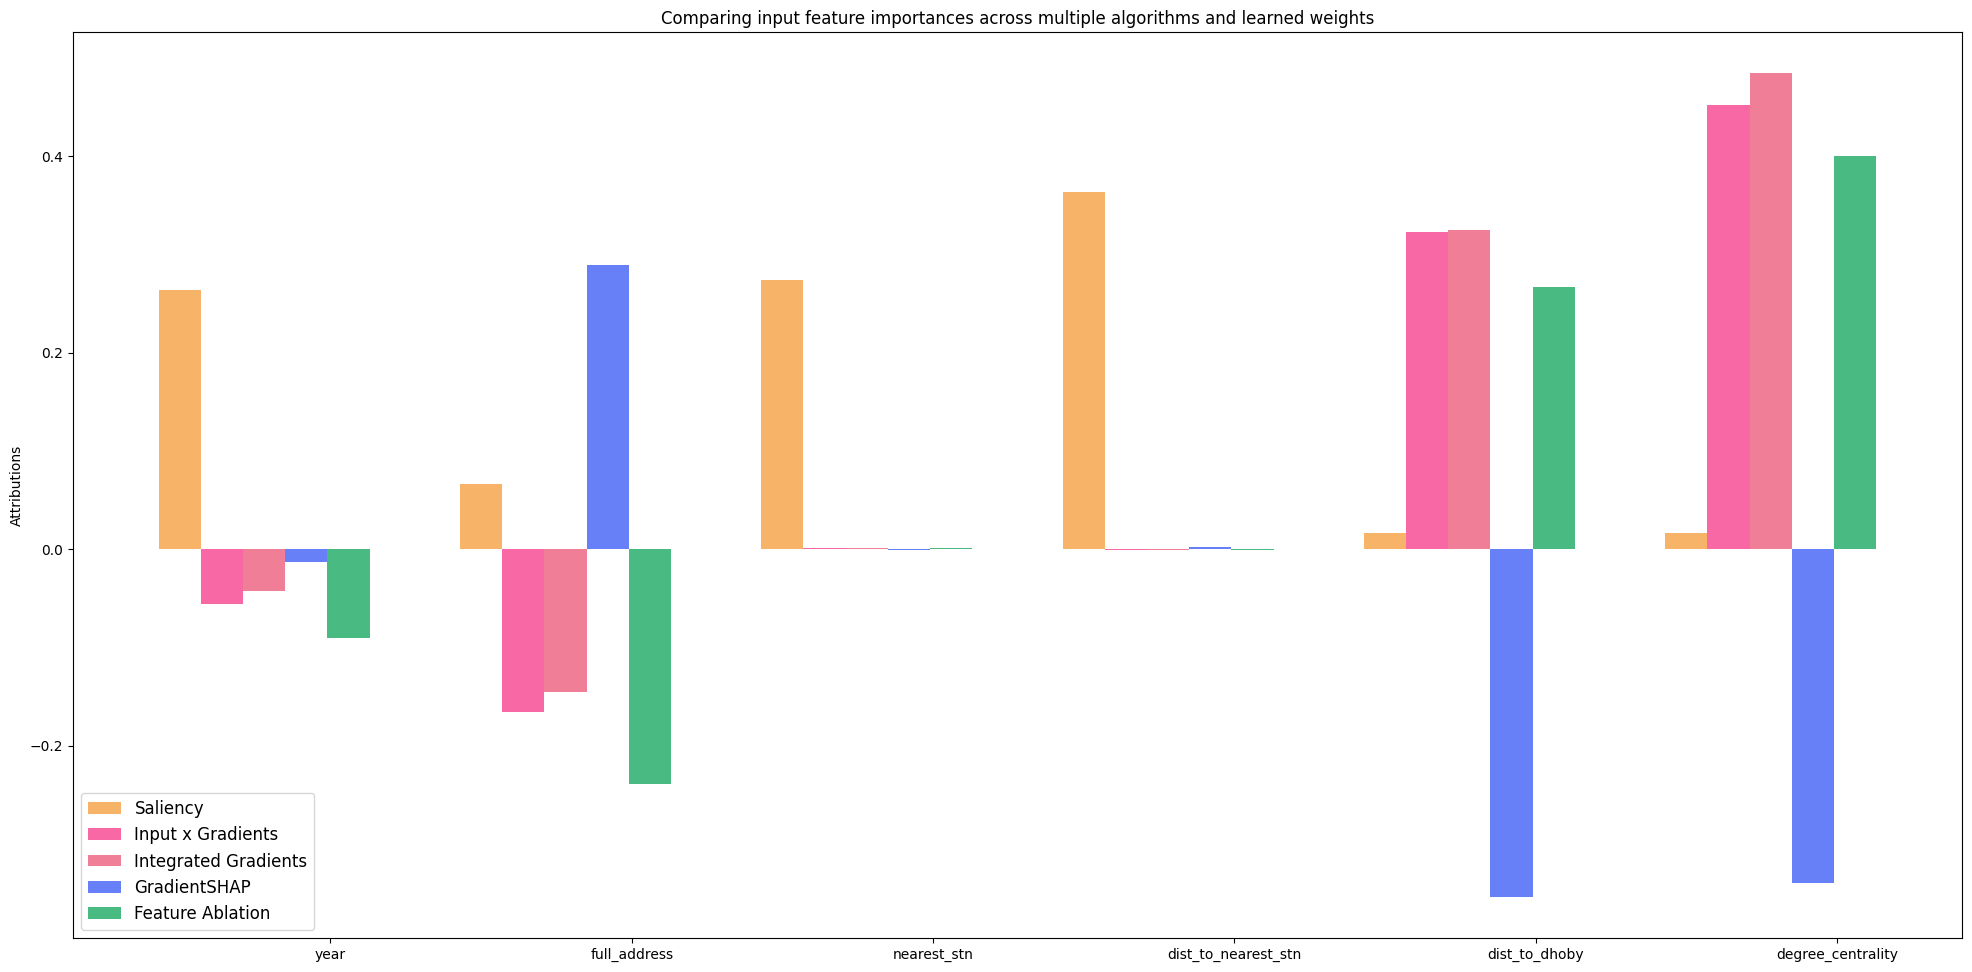

In [56]:
feature_names = df_train.drop(target, axis=1).columns

x_axis_data = np.arange(X_test.shape[1])
x_axis_data_labels = list(map(lambda idx: feature_names[idx], x_axis_data))

sal_attr_test_sum = sal_attr_test.detach().numpy().sum(0)
sal_attr_test_norm_sum = sal_attr_test_sum / np.linalg.norm(sal_attr_test_sum, ord=1)

ixg_attr_test_sum = ixg_attr_test.detach().numpy().sum(0)
ixg_attr_test_norm_sum = ixg_attr_test_sum / np.linalg.norm(ixg_attr_test_sum, ord=1)

ig_attr_test_sum = ig_attr_test.detach().numpy().sum(0)
ig_attr_test_norm_sum = ig_attr_test_sum / np.linalg.norm(ig_attr_test_sum, ord=1)

gs_attr_test_sum = gs_attr_test.detach().numpy().sum(0)
gs_attr_test_norm_sum = gs_attr_test_sum / np.linalg.norm(gs_attr_test_sum, ord=1)

fa_attr_test_sum = fa_attr_test.detach().numpy().sum(0)
fa_attr_test_norm_sum = fa_attr_test_sum / np.linalg.norm(fa_attr_test_sum, ord=1)

width = 0.14
legends = ['Saliency','Input x Gradients', 'Integrated Gradients', 'GradientSHAP', 'Feature Ablation']

plt.figure(figsize=(20, 10))

ax = plt.subplot()
ax.set_title('Comparing input feature importances across multiple algorithms and learned weights')
ax.set_ylabel('Attributions')

FONT_SIZE = 16
plt.rc('font', size=FONT_SIZE)            # fontsize of the text sizes
plt.rc('axes', titlesize=FONT_SIZE)       # fontsize of the axes title
plt.rc('axes', labelsize=FONT_SIZE)       # fontsize of the x and y labels
plt.rc('legend', fontsize=FONT_SIZE - 4)  # fontsize of the legend

ax.bar(x_axis_data, sal_attr_test_norm_sum, width, align='center', alpha=0.8, color='#f5a142')
ax.bar(x_axis_data + width, ixg_attr_test_norm_sum, width, align='center', alpha=0.8, color='#f5428d')
ax.bar(x_axis_data + 2 * width, ig_attr_test_norm_sum, width, align='center', alpha=0.8, color='#eb5e7c')
ax.bar(x_axis_data + 3 * width, gs_attr_test_norm_sum, width, align='center',  alpha=0.8, color='#4260f5')
ax.bar(x_axis_data + 4 * width, fa_attr_test_norm_sum, width, align='center', alpha=1.0, color='#49ba81')

ax.autoscale_view()
plt.tight_layout()

ax.set_xticks(x_axis_data + 0.5)
ax.set_xticklabels(x_axis_data_labels)

plt.legend(legends, loc=3)
plt.show()

> Read the following [descriptions](https://captum.ai/docs/attribution_algorithms) and [comparisons](https://captum.ai/docs/algorithms_comparison_matrix) in Captum to build up your understanding of the difference of various explainability algorithms. Based on your plot, identify the three most important features for regression. Explain how each of these features influences the regression outcome.


\# TODO: \<Enter your answer here\>

Part B, Q4 (10 marks)
---

Model degradation is a common issue faced when deploying machine learning models (including neural networks) in the real world. New data points could exhibit a different pattern from older data points due to factors such as changes in government policy or market sentiments. For instance, housing prices in Singapore have been increasing and the Singapore government has introduced 3 rounds of cooling measures over the past years (16 December 2021, 30 September 2022, 27 April 2023).

In such situations, the distribution of the new data points could differ from the original data distribution which the models were trained on. Recall that machine learning models often work with the assumption that the test distribution should be similar to train distribution. When this assumption is violated, model performance will be adversely impacted.  In the last part of this assignment, we will investigate to what extent model degradation has occurred.




---



In [9]:
pip install "alibi-detect"

Note: you may need to restart the kernel to use updated packages.


In [10]:
from alibi_detect.cd import TabularDrift

> Evaluate your model from B1 on data from year 2022 and report the test R2.

In [14]:
b1_model = TabularModel.load_model("models/b1_model")

df = pd.read_csv('hdb_price_prediction.csv')
df_test = df[df["year"] == 2022]

pred = b1_model.predict(df_test)
test_results = b1_model.evaluate(df_test)
print(f"RMSE: {np.sqrt(test_results[0]['test_mean_squared_error']):.0f}")
print(f"R2 score: {test_results[0]['test_r2_score']:.4f}")

2025-03-11 10:15:55,838 - {pytorch_tabular.tabular_model:171} - INFO - Experiment Tracking is turned off

2025-03-11 10:15:55,840 - {pytorch_tabular.tabular_model:342} - INFO - Preparing the Trainer

Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.rich_model_summary.RichModelSummary'>]. Skipping setting a default `ModelSummary` callback.
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Output()

/Users/yuki/Library/Mobile Documents/com~apple~CloudDocs/NTU/Y2S2/SC4001/Projects/Assignment1/.venv/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:424: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=9` in the `DataLoader` to improve performance.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │       13752151040.0       │
│  test_mean_squared_error  │       13752151040.0       │
│       test_r2_score       │    0.5079993009567261     │
└───────────────────────────┴───────────────────────────┘

RMSE: 117270
R2 score: 0.5080


> Evaluate your model from B1 on data from year 2023 and report the test R2.

In [15]:
df_test = df[df["year"] == 2023]

pred = b1_model.predict(df_test)
test_results = tabular_model.evaluate(df_test)
print(f"RMSE: {np.sqrt(test_results[0]['test_mean_squared_error']):.0f}")
print(f"R2 score: {test_results[0]['test_r2_score']:.4f}")

Output()

/Users/yuki/Library/Mobile Documents/com~apple~CloudDocs/NTU/Y2S2/SC4001/Projects/Assignment1/.venv/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:424: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=9` in the `DataLoader` to improve performance.


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │       22023643136.0       │
│  test_mean_squared_error  │       22023643136.0       │
│       test_r2_score       │    0.22778698801994324    │
└───────────────────────────┴───────────────────────────┘

RMSE: 148404
R2 score: 0.2278


> Did model degradation occur for the deep learning model?

\# TODO: \<Enter your answer here\>

Model degradation could be caused by [various data distribution shifts](https://huyenchip.com/2022/02/07/data-distribution-shifts-and-monitoring.html#data-shift-types): covariate shift (features), label shift and/or concept drift (altered relationship between features and labels).
There are various conflicting terminologies in the [literature](https://www.sciencedirect.com/science/article/pii/S0950705122002854#tbl1). Let’s stick to this reference for this assignment.

> Using the **Alibi Detect** library, apply the **TabularDrift** function with the training data (year 2020 and before) used as the reference and **detect which features have drifted** in the 2023 test dataset. Before running the statistical tests, ensure you **sample 1000 data points** each from the train and test data. Do not use the whole train/test data. (Hint: use this example as a guide https://docs.seldon.io/projects/alibi-detect/en/stable/examples/cd_chi2ks_adult.html)


In [39]:
continuous_cols=["dist_to_nearest_stn", "dist_to_dhoby", "degree_centrality",
                     "eigenvector_centrality", "remaining_lease_years", "floor_area_sqm"]
categorical_cols=["month", "town", "flat_model_type", "storey_range"]
target = ['resale_price']

category_map = {}
for i, col in enumerate(categorical_cols):
    category_map[i] = df[col].unique().tolist()

n_ref = 1000
n_test = 1000

df_ref = df[df["year"] <= 2020]
df_ref = df_ref[:n_ref]

df_test = df[df["year"] == 2023]
df_test = df_test[:n_test]

X_ref = df_ref.drop(target, axis=1).values
X_test = df_test.drop(target, axis=1).values

In [ ]:
categories_per_feature = {f: None for f in list(category_map.keys())}
cd = TabularDrift(X_ref, p_val=.05, categories_per_feature=categories_per_feature, n_features=10) # TODO: Check what is n_features
preds = cd.predict(X_test)
labels = ['No!', 'Yes!']
print('Drift? {}'.format(labels[preds['data']['is_drift']]))

Drift? Yes!


In [ ]:
feature_names = categorical_cols + continuous_cols
for f in range(cd.n_features):
    stat = 'Chi2' if f in list(categories_per_feature.keys()) else 'K-S'
    fname = feature_names[f]
    stat_val, p_val = preds['data']['distance'][f], preds['data']['p_val'][f]
    print(f'{fname} -- {stat} {stat_val:.3f} -- p-value {p_val:.3f}')

month -- Chi2 0.000 -- p-value 1.000
town -- Chi2 1996.002 -- p-value 0.000
flat_model_type -- Chi2 667.474 -- p-value 0.000
storey_range -- Chi2 1750.200 -- p-value 0.004
dist_to_nearest_stn -- K-S 0.251 -- p-value 0.000
dist_to_dhoby -- K-S 0.055 -- p-value 0.094
degree_centrality -- K-S 0.218 -- p-value 0.000
eigenvector_centrality -- K-S 0.029 -- p-value 0.783
remaining_lease_years -- K-S 0.195 -- p-value 0.000
floor_area_sqm -- K-S 0.080 -- p-value 0.003


> Assuming that the flurry of housing measures have made an impact on the relationship between all the features and resale_price (i.e. P(Y|X) changes), which type of data distribution shift possibly led to model degradation?

\# TODO: \<Enter your answer here\>

> From your analysis via TabularDrift, which features contribute to this shift?

\# TODO: \<Enter your answer here\>

> Suggest 1 way to address model degradation and implement it, showing improved test R2 for year 2023.

\# TODO: \<Enter your answer here\>

In [ ]:
# TODO: Enter your code here